### Understanding PCA

from tutorial https://plot.ly/ipython-notebooks/principal-component-analysis/ (Sebastian Raschka)

#### Load Iris

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [3]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

#### PCA over Covariance Matrix

In [4]:
import numpy as np

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [5]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [28]:
np.linalg.norm(eig_vecs[0])

0.9999999999999993

- Eigenvectors can be interpreted as influence on the PCs (rows = features, cols  = PC1-4)
    - zB sepal_len, petal_len, petal_wid influence PC1 strongly in one direction
    - zB sepal_wid influences PC2 strongly negatively
    
- Different to Loadings! 
    - see https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn
    - and https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another

#### PCA over SVD

In [6]:
#left-singular vecs are identitical!
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [7]:
#Singular values differ
s

array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839])

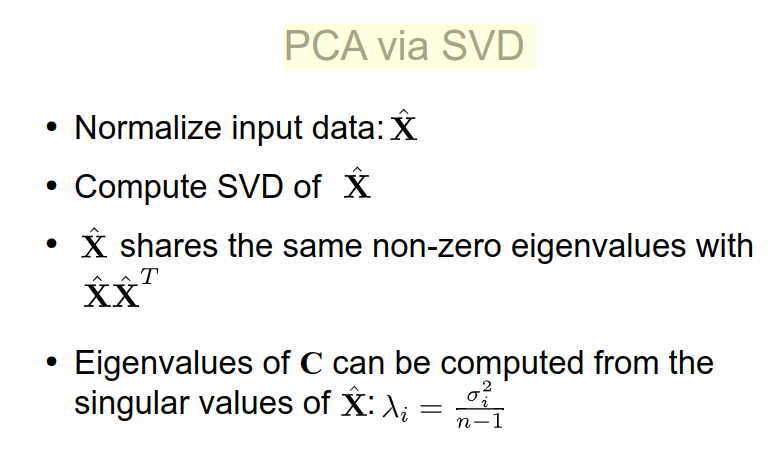

In [8]:
from IPython.display import Image
Image(filename = "pic.png", width=400, height=250)

In [9]:
s * s / len(X_std)

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

#### Connecting the dots

In [10]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [11]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [12]:
np.transpose(eig_vecs)

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [13]:
np.linalg.inv(eig_vecs)

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [14]:
np.round(np.transpose(eig_vecs).dot(eig_vecs),decimals=2)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0.],
       [ 0., -0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

In [15]:
np.round(np.linalg.inv(eig_vecs).dot(eig_vecs),decimals=2)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])

- both multiplikation with inverse, as well as multiplikation with transposed result in I (Identity Matrix).

### Formula: 

Y = X x W    

with: 
- Y = PCs 
- X = Data matrix 
- W = Eigenvectors 

Solve by: | * W^T 

Y x W^T = X x W^T x W

*as W^T x W = 1:* <br> 
 
**Y x W^T = X**

i.e. Y = Basis = PCs, W^T = Encoding = Eigenvectors

In [16]:
#How much % of variance is explained by first two dimensions?
var_exp = [round((i / sum(eig_vals))*100,2) for i in sorted(eig_vals, reverse=True)]
var_exp

[72.77, 23.03, 3.68, 0.52]

In [17]:
#Transformation matrix W 
matrix_w = np.delete(eig_vecs, [2,3], axis=1)
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [18]:
#Principal components -> Y = X x W
Y_2dim = X_std.dot(matrix_w)
Y_4dim = X_std.dot(eig_vecs)
Y_4dim

array([[-2.26454173e+00, -5.05703903e-01, -1.21943348e-01,
         2.30733235e-02],
       [-2.08642550e+00,  6.55404729e-01, -2.27250832e-01,
         1.03208244e-01],
       [-2.36795045e+00,  3.18477311e-01,  5.14796236e-02,
         2.78252250e-02],
       [-2.30419716e+00,  5.75367713e-01,  9.88604444e-02,
        -6.63114622e-02],
       [-2.38877749e+00, -6.74767397e-01,  2.14278490e-02,
        -3.73972870e-02],
       [-2.07053681e+00, -1.51854856e+00,  3.06842583e-02,
         4.39877494e-03],
       [-2.44571134e+00, -7.45626750e-02,  3.42197636e-01,
        -3.80965668e-02],
       [-2.23384186e+00, -2.47613932e-01, -8.25744645e-02,
        -2.55051623e-02],
       [-2.34195768e+00,  1.09514636e+00,  1.53562399e-01,
        -2.67938291e-02],
       [-2.18867576e+00,  4.48629048e-01, -2.46559522e-01,
        -3.99073035e-02],
       [-2.16348656e+00, -1.07059558e+00, -2.64009373e-01,
         1.53011377e-02],
       [-2.32737775e+00, -1.58587455e-01,  1.00165616e-01,
      

In [19]:
#Restoring original dataframe (2 dimensions) -> X = Y * W^T
pd.DataFrame(Y_2dim.dot(np.transpose(matrix_w))).head()

,0,1,2,3
0,-0.994649,1.064436,-1.305606,-1.247769
1,-1.333909,-0.057144,-1.226569,-1.222979
2,-1.355525,0.328843,-1.383099,-1.360172
3,-1.417867,0.074286,-1.351461,-1.340917
4,-0.996601,1.253632,-1.374252,-1.306979


In [20]:
#Restoring original dataframe (4 dimensions)
pd.DataFrame(Y_4dim.dot(np.transpose(eig_vecs))).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [21]:
#Does this match the original dataframe?
pd.DataFrame(X_std).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Coooool :) Reconstruction Error visible with 2 dimensions, not with 4 dimensions!

Makes sense. 

#### PCA over Scikit Learn

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
#Eigenvectors 
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

Attention: Transposed - Features as Columns, PCs as Rows!

In [31]:
np.transpose(pca.components_)

array([[ 0.52237162,  0.37231836, -0.72101681, -0.26199559],
       [-0.26335492,  0.92555649,  0.24203288,  0.12413481],
       [ 0.58125401,  0.02109478,  0.14089226,  0.80115427],
       [ 0.56561105,  0.06541577,  0.6338014 , -0.52354627]])

**Loadings**

see: https://stackoverflow.com/questions/21217710/factor-loadings-using-sklearn

In [38]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [39]:
np.transpose(pca.components_) * np.sqrt(pca.explained_variance_)

array([[ 0.89421016,  0.35854928, -0.27770122, -0.03773647],
       [-0.45081822,  0.89132754,  0.0932195 ,  0.01787973],
       [ 0.99500666,  0.02031465,  0.05426497,  0.11539407],
       [ 0.96822861,  0.06299656,  0.24411001, -0.07540887]])

Now again, we have the PCs as Columns and the Features as Rows! (like in Sebastian Raschkas tutorial). Obviously, the absolute loadings onto PC1 are highest, onto PC4 lowest.